<a href="https://colab.research.google.com/github/Caroline-Camargo/RelatoriosPython-CalculoNumericoComputacional/blob/main/Relatorio4_CarolineSouzaCamargo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório 4 Caroline Souza Camargo

#MÉTODOS

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def trapm(a, b, n, f, grafico = False):
  h = (b - a) / n

  if n == 1:
    f0 = f(a)
    f1 = f(b)
    trap = h * (f0 + f1) / 2

  elif n > 1:
    sum = f(a)
    for i in range(1, n):
      sum = sum + 2 * f(a + i * h)
    sum = sum + f(b)
    trap = h * sum / 2

  if grafico:
    x_vals = np.linspace(a, b, 100)
    y_vals = [f(x) for x in x_vals]
    plt.plot(x_vals, y_vals, label='Função Original')

    for i in range(n):
        x_trap = [a + i * h, a + (i + 1) * h]
        y_trap = [f(x_trap[0]), f(x_trap[1])]
        plt.plot(x_trap, y_trap, 'r--')
        plt.fill_between(x_trap, y_trap, alpha=0.2, color='red')
    plt.title('Gráfico Trapézio')
    plt.legend()
    plt.show()

  return trap

In [ ]:
def simp13m(a, b, n, f, grafico = False):
  h = (b - a) / n

  if n == 1:
    f0 = f(a)
    f1 = f((a + b) / 2)
    f2 = f(b)
    simp13 = 2 * h * (f0 + 4 * f1 + f2) / 6

  elif n > 1:
    sum = f(a)
    for i in range (1, n - 2, 2):
      sum = sum + 4 * f(a + i * h) + 2 * f(a + (i + 1) * h)
    sum = sum + 4 * f(a + (n - 1) * h) + f(b)
    simp13 = h * sum / 3

  if grafico:
    x_vals = np.linspace(a, b, 100)
    y_vals = f(x_vals)

    area_x = np.linspace(a, b, n + 1)
    area_y = f(area_x)

    plt.plot(x_vals, y_vals, label='Função Original')

    for i in range(n):
        x_segment = np.linspace(area_x[i], area_x[i+1], 100)
        y_segment = f(x_segment)
        p = np.polyfit([area_x[i], (area_x[i] + area_x[i+1])/2, area_x[i+1]],
                       [f(area_x[i]), f((area_x[i] + area_x[i+1])/2), f(area_x[i+1])], 2)
        y_parabola = np.polyval(p, x_segment)
        plt.plot(x_segment, y_parabola, 'r--')
        plt.fill_between(x_segment, y_parabola, alpha=0.2, color='red')
    plt.title('Gráfico Simpson 1/3')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
  return simp13

In [ ]:
def simp38m(a, b, n, f, grafico=False):
    h = (b - a) / n

    if n == 1:
        f0 = f(a)
        f1 = f((2 * a + b) / 3)
        f2 = f((a + 2 * b) / 3)
        f3 = f(b)
        simp38 = 3 * h * (f0 + 3 * f1 + 3 * f2 + f3) / 8

    elif n > 1:
        sum = f(a) + f(b)
        for i in range(1, n):
            if i % 3 == 0:
                sum = sum + 2 * f(a + i * h)
            else:
                sum = sum + 3 * f(a + i * h)
        simp38 = 3 * h * sum / 8

    if grafico:
      x_vals = np.linspace(a, b, 100)
      y_vals = f(x_vals)

      area_x = np.linspace(a, b, n + 1)
      area_y = f(area_x)
      plt.plot(x_vals, y_vals, label='Função Original')

      for i in range(n):
        x_segment = np.linspace(area_x[i], area_x[i + 1], 100)
        y_segment = f(x_segment)
        p = np.polyfit([area_x[i], (2 * area_x[i] + area_x[i + 1]) / 3, (area_x[i] + 2 * area_x[i + 1]) / 3,
                        area_x[i + 1]],
                        [f(area_x[i]), f((2 * area_x[i] + area_x[i + 1]) / 3),
                        f((area_x[i] + 2 * area_x[i + 1]) / 3), f(area_x[i + 1])], 3)
        y_curve = np.polyval(p, x_segment)
        plt.plot(x_segment, y_curve, 'r--')
        plt.fill_between(x_segment, y_curve, color='red', alpha=0.2)
      plt.title('Gráfico Simpson 3/8')
      plt.xlabel('x')
      plt.ylabel('y')
      plt.legend()
      plt.grid(True)
      plt.show()

    return simp38

In [ ]:
def euler(a, b, y0, n, f):
  vetX = []
  vetY = []

  h = (b - a) / n
  x = a
  y = y0
  vetX.append(x)
  vetY.append(y)
  fxy = f(x, y)


  for i in range(1, n + 1):
    x = a + i * h
    y = y + h * fxy

    fxy = f(x, y)
    vetX.append(x)
    vetY.append(y)

  print(f'L \t X[L] \t Y[L] \t F[L]')
  for i in range(0, n+1):
    print(f'{i} \t {vetX[i]:.3f} \t {vetY[i]:.3f} \t{f(vetX[i], vetY[i]):.3f}')

  return vetX, vetY, vetY[-1]

In [ ]:
def RungeKutta(a, b, y0, n, f):
  vetX = []
  vetY = []

  h = (b - a) / n
  xt = a
  yt = y0
  vetX.append(xt)
  vetY.append(yt)

  for i in range(1, n + 1):
    x = xt
    y = yt
    k1 = f(x, y)

    x = xt + h/2
    y = yt + (h/2) * k1
    k2 = f(x, y)

    y = yt + (h/2) * k2
    k3 = f(x, y)

    x = xt + h
    y = yt + h * k3
    k4 = f(x, y)

    xt = a + i * h
    yt = yt + (h/6) * (k1 + 2 * (k2 + k3) + k4)

    vetX.append(xt)
    vetY.append(yt)

  print(f'L \t X[L] \t Y[L] \t F[L]')
  for i in range(0, n+1):
    print(f'{i} \t {vetX[i]:.3f} \t {vetY[i]:.3f} \t{f(vetX[i], vetY[i]):.3f}')

  return vetX, vetY, vetY[-1]


#QUESTÕES

##QUESTÃO 1

**Calcular**
\begin{equation}
    \int_{2}^{5} \frac{1}{x \log_e(x)} \, dx
\end{equation}
**com m = 6 pelas regras abaixo.**

**a) Trapézio**

**b) 1/3 de Simpson**

**c) 3/8 de Simpson**

**d) Comparar esses três resultados com o valor exato log_e * (log_e*(5)) − log_e* (log_e*(2)) ≈ 0,84240**

**e) Plotar os gráficos para cada um dos métodos**

O primeiro passo para resolução foi elaborar a equação lambda da função em questão e após aplicar para cada um dos métodos, sendo eles o método do trapésio, 1/3 de Simpson e 3/8 de Simpson. Vale ressaltar, que na implementação dos métodos já foi realizado também a plotagem do gráfico.
Abaixo segue a execução dos métodos e a saida dos mesmos:

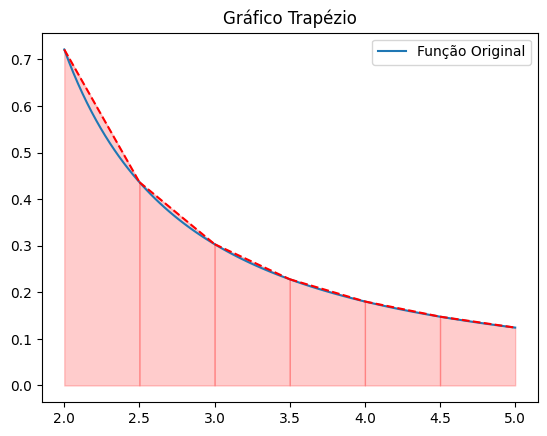

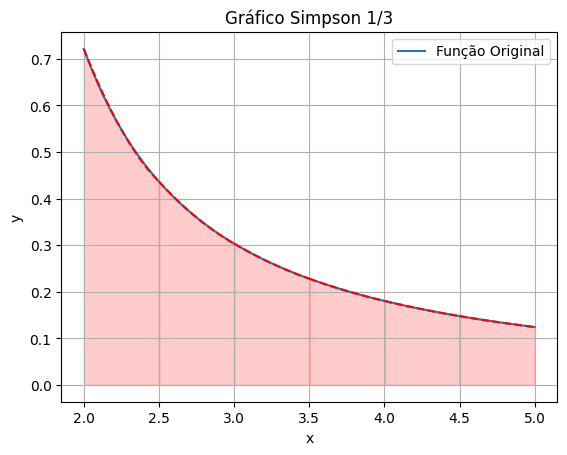

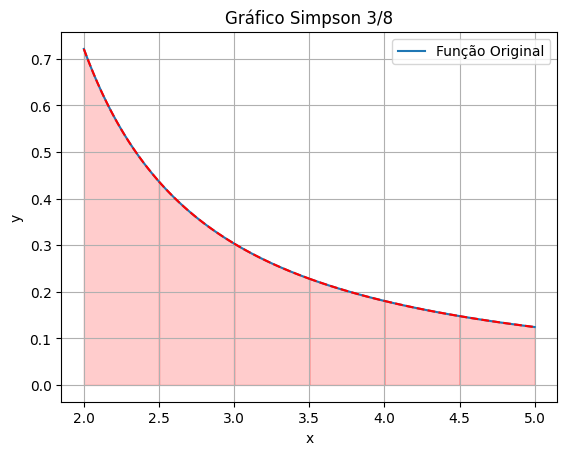



Resultado Trapézio: 0.85946

Resultado Simpson 1/3: 0.84376

Resultado Simpson 3/8: 0.84485

Resultado Exato: 0.8424


In [ ]:
a = 2
b = 5
m = 6
valorExato =  0.84240
f = lambda x: 1 / (x * np.log(x))

resultados = []
resultados.append(round(trapm(a, b, m, f, True), 5))
resultados.append(round(simp13m(a, b, m, f, True), 5))
resultados.append(round(simp38m(a, b, m, f, True), 5))

print(f'\n\nResultado Trapézio: {resultados[0]}\n')
print(f'Resultado Simpson 1/3: {resultados[1]}\n')
print(f'Resultado Simpson 3/8: {resultados[2]}\n')
print(f'Resultado Exato: {valorExato}')

Analisando apenas os gráficos obtidos percebe-se que o gráfico que menos se ajustou aos dados foi o gráfico do trapézio. Isso era um comportamento esperado, já que esse método de aproximação possui como característica  dividir a área sob a curva em segmentos trapezoidais. Essa característica tende a ter uma precisão inferior em relação a métodos mais sofisticados, como o método de 1/3 de Simpson e o método de 3/8 de Simpson. O resultado encontrado pelo método do trapézio para a questão dada foi 0.85946 enquanto que o resultado exato era 0.8424, ou seja, uma diferença de 0.01606 entre o valor aproximado e o valor exato. Sendo a maior diferença entre os métodos que foram aproximados.  


Por outro lado, os métodos de Simpson (1/3 e 3/8) proporcionaram estimativas mais próximas do resultado exato do que o método do trapézio.
Isso ocorre porque a forma como os polinômios de interpolação são calculados é mais eficiente. O Simpson de 1/3 utiliza parábolas para interpolar a função em cada par de subintervalos adjacentes e no Simpson 3/8 a diferença está que são usados três pontos consecutivos para ajustar a curva.
Logo, percebe-se que o método de Simpson oferece maior precisão em comparação com abordagens mais simples, como o método do trapézio.


##QUESTÃ0 2

**Resolver o problema de valor inicial abaixo utilizando o método de Euler e Runge-Kutta de ordem quatro com o número de subintervalos m indicado.**

**a) y'= $x^2$ + $y^2$, y(1) = 0, x ∈ [1, 2] e m = 8**


Segue a baixo a execução do método de Euler e Runge Kutta com a aplicação dos valores fornecidos pela questão. Vale ressaltar, que o método em questão exibe também o passo a passo da execução do algoritmo, com os valores aproximados.

In [ ]:
a = 1
b = 2
m = 8
f = lambda x, y: x**2 + y**2
y1 = 0

X1, Y1, resultado1 = euler(a, b, y1, m, f)
print(f'\nResultado Euler: \n{resultado1}\n\n')

X2, Y2, resultado2 = RungeKutta(a, b, y1, m, f)
print(f'\nResultado Runge Kutta: \n{resultado2}\n\n')

L 	 X[L] 	 Y[L] 	 F[L]
0 	 1.000 	 0.000 	1.000
1 	 1.125 	 0.125 	1.281
2 	 1.250 	 0.285 	1.644
3 	 1.375 	 0.491 	2.131
4 	 1.500 	 0.757 	2.823
5 	 1.625 	 1.110 	3.873
6 	 1.750 	 1.594 	5.603
7 	 1.875 	 2.294 	8.780
8 	 2.000 	 3.392 	15.505

Resultado Euler: 
3.391950316159075


L 	 X[L] 	 Y[L] 	 F[L]
0 	 1.000 	 0.000 	1.000
1 	 1.125 	 0.142 	1.286
2 	 1.250 	 0.325 	1.668
3 	 1.375 	 0.566 	2.211
4 	 1.500 	 0.890 	3.042
5 	 1.625 	 1.350 	4.464
6 	 1.750 	 2.063 	7.320
7 	 1.875 	 3.359 	14.801
8 	 2.000 	 6.684 	48.671

Resultado Runge Kutta: 
6.683612959581662




Os resultados numéricos mostram que o método de Runge-Kutta produziu o resultado aproximado de 6.68 enquanto que o método de Euler 3.39, sendo bastante diferentes os valores encontrados.
Vale ressaltar, que uma análise completa dos conjuntos de dados depende do resultado exato. Mas por euler ser um método simples de primeira ordem que utiliza uma aproximação linear para estimar a solução e Runge-Kutta ser de quarta ordem, possui mais chance de uma aproximação mais precisa. No entanto, a escolha entre Euler e Runge-Kutta muitas vezes depende da precisão desejada e da natureza do problema em questão.

#Anotações Aula

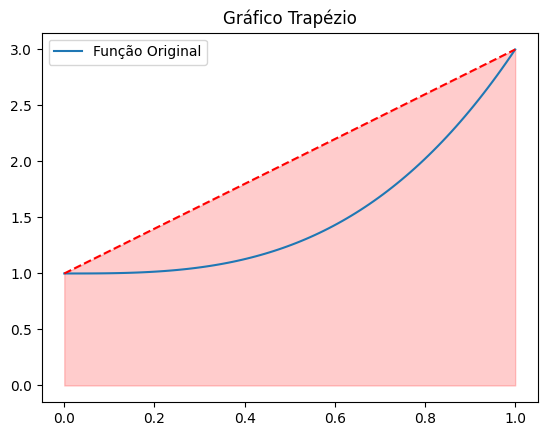

2.0


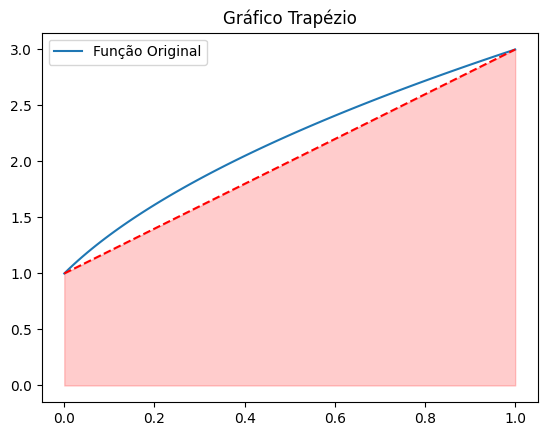

2.0


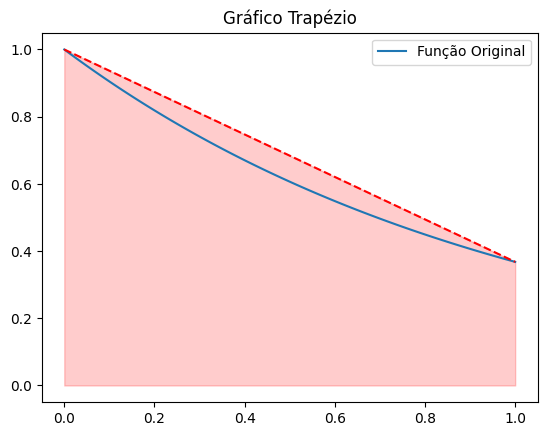

0.6839397205857212


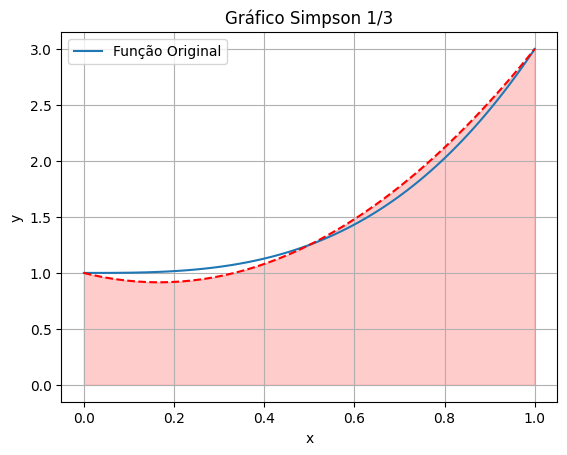

3.0


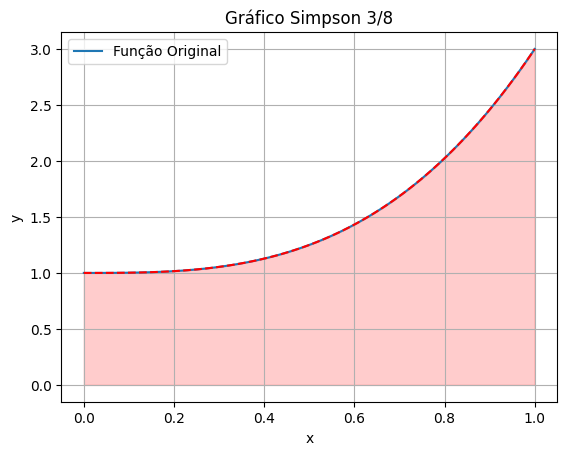

4.5


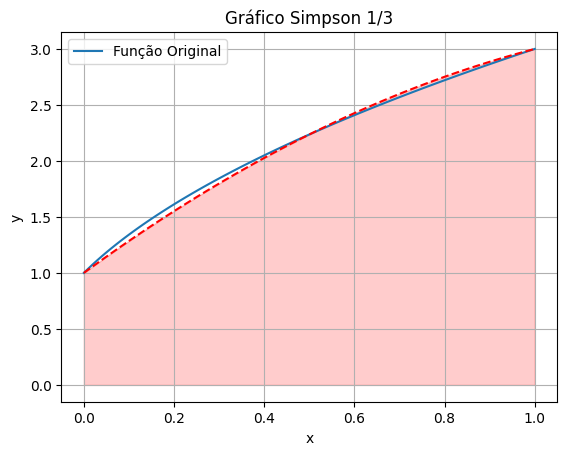

4.314757303333053


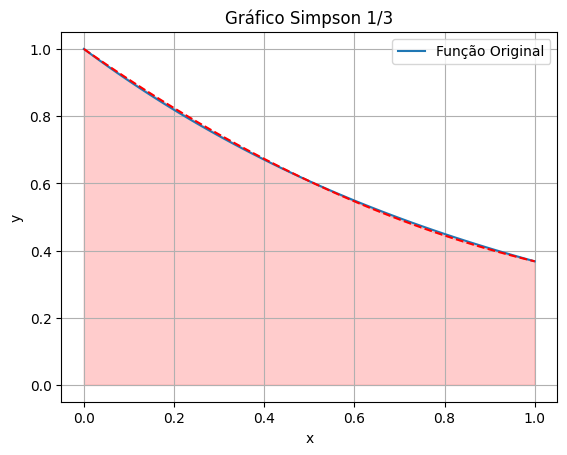

1.2646673600073253
1a)
0.265625
0.19401041666666666

1b)
-0.26785714285714285
-0.26706349206349206

1f)
-0.17776434558349452
-0.17682156924372924

2a)
0.639900477687986

2b)
31.36528565006375

2c)
0.7842407666178157

2d)
-6.428722218023164

2f)
0.3923735618113861

2g)
2.3481456796974403

8a)
340.0

8b)
333.3333333333333


L 	 X[L] 	 Y[L] 	 F[L]
0 	 0.000 	 1.000 	0.000
1 	 0.100 	 1.000 	-0.100
2 	 0.200 	 0.990 	-0.198
3 	 0.300 	 0.970 	-0.291
4 	 0.400 	 0.941 	-0.376
5 	 0.500 	 0.903 	-0.452
6 	 0.600 	 0.858 	-0.515
7 	 0.700 	 0.807 	-0.565
8 	 0.800 	 0.750 	-0.600
9 	 0.900 	 0.690 	-0.621
10 	 1.000 	 0.628 	-0.628
0.6281565095552948


L 	 X[L] 	 Y[L] 	 F[L]
0 	 0.000 	 1.000 	0.000
1 	 0.100 	 0.995 	-0.100
2 	 0.200 	 0.980 	-0.196
3 	 0.300 	 0.956 	-0.287
4 	 0.400 	 0.923 	-0.369
5 	 0.500 	 0.882 	-0.441
6 	 0.600 	 0.835 	-0.501
7 	 0.700 	 0.783 	-0.548
8 	 0.800 	 0.726 	-0.581
9 	 0.900 	 0.667 	-0.600
10 	 1.000 	 0.607 	-0.607
0.606530726398907




In [ ]:
fa = lambda x: 2*x**3 + 1
fb = lambda x: np.sqrt(8*x + 1)
fc = lambda x: np.exp(-x)

a = 0
b = 1.0
n = 1

print(trapm(a, b, n, fa, True))
print(trapm(a, b, n, fb, True))
print(trapm(a, b, n, fc, True))

n = 1
print(simp13m(a, b, n, fa, True))
print(simp38m(a, b, n, fa, True))

print(simp13m(a, b, n, fb, True))
print(simp13m(a, b, n, fc, True))


f1a = lambda x: x**4
print(f'1a)\n{trapm(0.5, 1, 1, f1a)}')
print(f'{simp13m(0.5, 1, 2, f1a)}')

f1b = lambda x: 2 / (x - 4)
print(f'\n1b)\n{trapm(0.0, 0.5, 1, f1b)}')
print(f'{simp13m(0.0, 0.5, 2, f1b)}')

f1f = lambda x: 2 / (x**2 - 4)
print(f'\n1f)\n{trapm(0.0, 0.35, 1, f1f)}')
print(f'{simp13m(0.0, 0.35, 2, f1f)}')

f2a = lambda x: x * math.log(x)
print(f'\n2a)\n{trapm(1, 2, 4, f2a)}')

f2b = lambda x: (x**3) * math.e**x
print(f'\n2b)\n{trapm(-2, 2, 4, f2b)}')

f2c = lambda x: 2 / (x**2 + 4)
print(f'\n2c)\n{trapm(0, 2, 6, f2c)}')

f2d = lambda x: (x**2) * math.cos(x)
print(f'\n2d)\n{trapm(0, math.pi, 6, f2d)}')

f2f = lambda x: 1 / (x**2 + 4)
print(f'\n2f)\n{trapm(0, 2, 8, f2f)}')

f2g = lambda x: x / math.sqrt(x**2 - 4)
print(f'\n2g)\n{trapm(3, 5, 8, f2g)}')

f8 = lambda x: math.sqrt(x**4)
print(f'\n8a)\n{trapm(0, 10, 5, f8)}')
print(f'\n8b)\n{simp13m(0, 10, 8, f8)}\n\n')



f = lambda x, y: -x * y
X1, Y1, resultado1 = euler(0, 1, 1, 10, f)
print(f'{resultado1}\n\n')

X2, Y2, resultado2 = RungeKutta(0, 1, 1, 10, f)
print(f'{resultado2}\n\n')

def graficoEulervsRK4(f, X1, Y1, X2, Y2):
  plt.plot(X1, Y1, 'o-', label='Euler')
  plt.plot(X2, Y2, 's-', label='Runge-Kutta')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Euler vs. Runge-Kutta')

  plt.legend()
  plt.show()

#graficoEulervsRK4(f, X1, Y1, X2, Y2)